# Import Libraries

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [61]:
data = pd.read_csv("50_Startups.csv")
print(data.head())
x = data.iloc[:,:-1].values # which simply means take all rows and all columns except last one
y = data.iloc[:,3].values   

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [62]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [63]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [64]:
data.shape

(50, 4)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [66]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [67]:
corr = data.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Visualize The Dataset

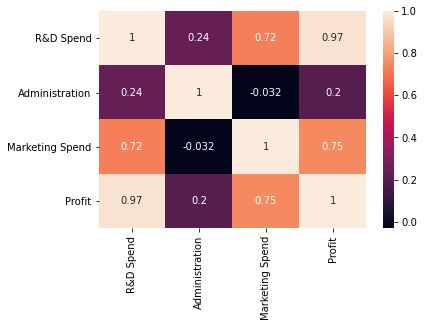

In [68]:
sns.heatmap(corr,annot=True)
plt.show()

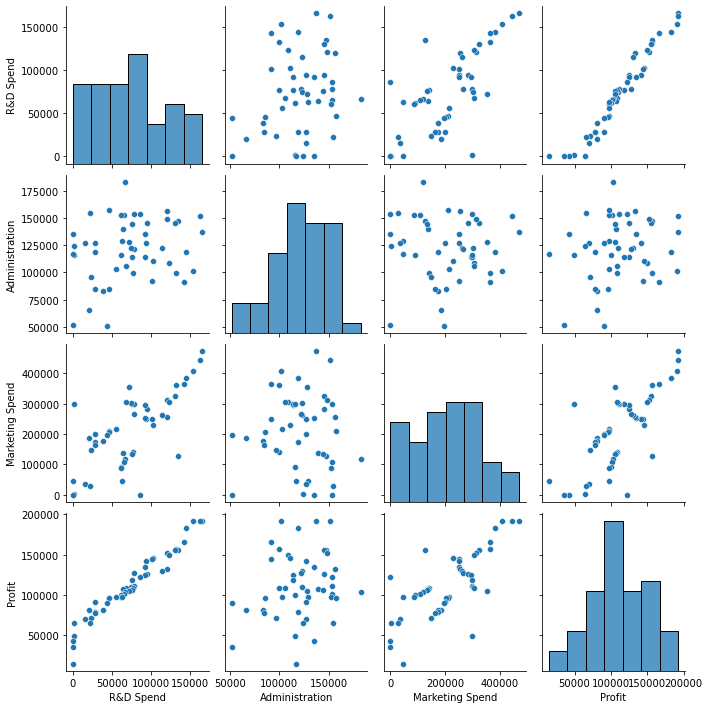

In [69]:
sns.pairplot(data)
plt.show()

# Split dataset into training set and test set

In [70]:
# Dividing input and output data to train and test data
# Training : Testing = 80 : 20
x = data.iloc[:,:-1].values # which simply means take all rows and all columns except last one
y = data.iloc[:,3].values   
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, 
                                                     random_state = 0)
xtrain

array([[ 55493.95, 103057.49, 214634.81],
       [ 46014.02,  85047.44, 205517.64],
       [ 75328.87, 144135.98, 134050.07],
       [ 46426.07, 157693.92, 210797.67],
       [ 91749.16, 114175.79, 294919.57],
       [130298.13, 145530.06, 323876.68],
       [119943.24, 156547.42, 256512.92],
       [  1000.23, 124153.04,   1903.93],
       [   542.05,  51743.15,      0.  ],
       [ 65605.48, 153032.06, 107138.38],
       [114523.61, 122616.84, 261776.23],
       [ 61994.48, 115641.28,  91131.24],
       [ 63408.86, 129219.61,  46085.25],
       [ 78013.11, 121597.55, 264346.06],
       [ 23640.93,  96189.63, 148001.11],
       [ 76253.86, 113867.3 , 298664.47],
       [ 15505.73, 127382.3 ,  35534.17],
       [120542.52, 148718.95, 311613.29],
       [ 91992.39, 135495.07, 252664.93],
       [ 64664.71, 139553.16, 137962.62],
       [131876.9 ,  99814.71, 362861.36],
       [ 94657.16, 145077.58, 282574.31],
       [ 28754.33, 118546.05, 172795.67],
       [     0.  , 116983.8 ,  451

# Fit LinearRegression Model

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [72]:
ypred = model.predict(xtest)
ypred

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

In [73]:
df = pd.DataFrame(data={'Predicted value':ypred.flatten(),'Actual Value':ytest.flatten()})
df

,Predicted value,Actual Value
0,103901.896970,103282.38
1,132763.059931,144259.40
2,133567.903700,146121.95
3,72911.789767,77798.83
4,179627.925672,191050.39
5,115166.648648,105008.31
6,67113.576906,81229.06
7,98154.806868,97483.56
8,114756.115552,110352.25
9,169064.014088,166187.94


In [74]:
testing_data_model_score = model.score(xtest, ytest)
print("Model Score/Accuracy on Testing data",testing_data_model_score)

training_data_model_score = model.score(xtrain, ytrain)
print("Model Score/Accuracy on Training data",training_data_model_score)

Model Score/Accuracy on Testing data 0.9393955917820571
Model Score/Accuracy on Training data 0.9499572530324031


# Measure Accuracy

In [75]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2Score = r2_score(ypred, ytest)
print("R2 score of model is :" ,r2Score*100)
print("mean_sqrd_error is ==",mean_squared_error(ytest,ypred))


R2 score of model is : 93.59154989043084
mean_sqrd_error is == 77506468.16885409
